In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

# Load Dataset
file = 'output_data3.3.csv'
df = spark.read.csv(file, header=True, inferSchema=True)

# Displaying the first few rows
df.show()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/10 07:34:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/10/10 07:34:34 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/10/10 07:34:34 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


+---+----+------+------+------+-----+-----+-----------+-------+-----+-------+------+------+------+
| id| age|gender|height|weight|ap_hi|ap_lo|cholesterol|glucose|smoke|alcohol|active|cardio|   BMI|
+---+----+------+------+------+-----+-----+-----------+-------+-----+-------+------+------+------+
|  1|55.0|     1| 156.0|  85.0|140.0| 90.0|          3|      1|    0|      0|     1|     1|34.928|
|  2|52.0|     1| 165.0|  64.0|130.0| 70.0|          3|      1|    0|      0|     0|     1|23.508|
|  3|48.0|     0| 169.0|  82.0|150.0|100.0|          1|      1|    0|      0|     1|     1| 28.71|
|  4|48.0|     1| 156.0|  56.0|100.0| 80.0|          1|      1|    0|      0|     0|     0|23.011|
|  5|60.0|     1| 151.0|  67.0|120.0| 80.0|          2|      2|    0|      0|     0|     0|29.385|
|  7|62.0|     0| 178.0|  95.0|130.0| 90.0|          3|      3|    0|      0|     1|     1|29.984|
|  8|48.0|     1| 158.0|  71.0|110.0| 70.0|          1|      1|    0|      0|     1|     0|28.441|
|  9|54.0|

In [2]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# Remove 'id' from the list of columns
columns_without_id = [col for col in df.columns if col != 'id']

# Transform all columns (excluding 'id') into a feature vector
assembler = VectorAssembler(inputCols=columns_without_id, outputCol="features")
df_vector = assembler.transform(df).select("features")

# Compute the correlation matrix
matrix = Correlation.corr(df_vector, "features").head()[0].toArray()

# Display the correlation matrix
num_rows, num_cols = matrix.shape

# Define a fixed width for the columns
width = 8

# Print column headers
print("".join([col.ljust(width) for col in [""] + columns_without_id]))

for i in range(num_rows):
    values = ["{:.4f}".format(matrix[i, j]).ljust(width) for j in range(num_cols)]
    print(columns_without_id[i].ljust(width) + "".join(values))
    
# Count the number of rows
print(f"Number of Rows Left After Data Cleaning: {df.count()}")

23/10/10 07:34:47 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/10/10 07:34:47 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
/home/ubuntu/spark-3.2.1-bin-hadoop2.7/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


        age     gender  height  weight  ap_hi   ap_lo   cholesterolglucose smoke   alcohol active  cardio  BMI     
age     1.0000  0.0232  -0.0834 0.0660  0.2091  0.1465  0.1554  0.0991  -0.0483 -0.0294 -0.0102 0.2392  0.1137  
gender  0.0232  1.0000  -0.5190 -0.1636 -0.0589 -0.0511 0.0367  0.0210  -0.3388 -0.1714 -0.0056 -0.0074 0.1212  
height  -0.0834 -0.5190 1.0000  0.2964  0.0215  0.0154  -0.0587 -0.0211 0.1943  0.0960  -0.0071 -0.0118 -0.2451 
weight  0.0660  -0.1636 0.2964  1.0000  0.2421  0.2089  0.1251  0.0878  0.0629  0.0632  -0.0155 0.1719  0.8494  
ap_hi   0.2091  -0.0589 0.0215  0.2421  1.0000  0.6414  0.1898  0.0877  0.0227  0.0298  0.0004  0.4270  0.2346  
ap_lo   0.1465  -0.0511 0.0154  0.2089  0.6414  1.0000  0.1593  0.0698  0.0215  0.0337  -0.0008 0.3362  0.2031  
cholesterol0.1554  0.0367  -0.0587 0.1251  0.1898  0.1593  1.0000  0.4504  0.0098  0.0353  0.0087  0.2216  0.1591  
glucose 0.0991  0.0210  -0.0211 0.0878  0.0877  0.0698  0.4504  1.0000  -0.0055 0.0107  -0

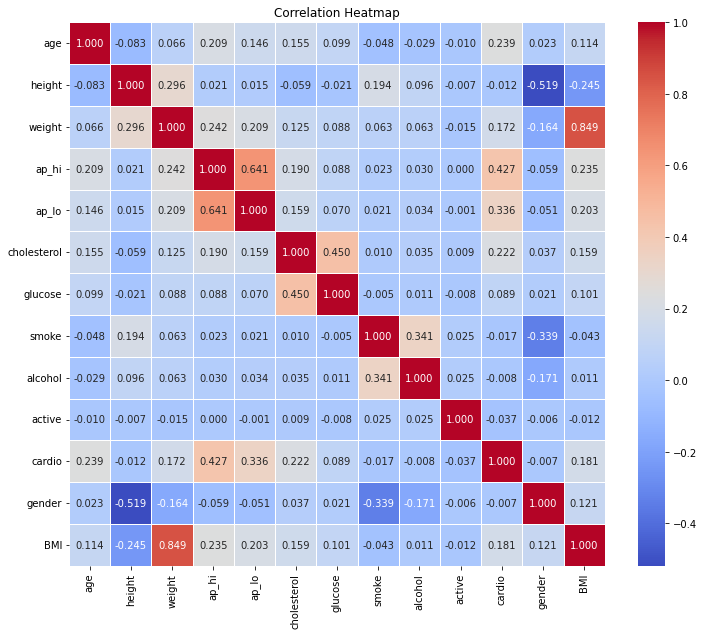

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

correlation_data = [
    [1.0000, -0.0834, 0.0660, 0.2091, 0.1465, 0.1554, 0.0991, -0.0483, -0.0294, -0.0102, 0.2392, 0.0232, 0.1137],
    [-0.0834, 1.0000, 0.2964, 0.0215, 0.0154, -0.0587, -0.0211, 0.1943, 0.0960, -0.0071, -0.0118, -0.5190, -0.2451],
    [0.0660, 0.2964, 1.0000, 0.2421, 0.2089, 0.1251, 0.0878, 0.0629, 0.0632, -0.0155, 0.1719, -0.1636, 0.8494],
    [0.2091, 0.0215, 0.2421, 1.0000, 0.6414, 0.1898, 0.0877, 0.0227, 0.0298, 0.0004, 0.4270, -0.0589, 0.2346],
    [0.1465, 0.0154, 0.2089, 0.6414, 1.0000, 0.1593, 0.0698, 0.0215, 0.0337, -0.0008, 0.3362, -0.0511, 0.2031],
    [0.1554, -0.0587, 0.1251, 0.1898, 0.1593, 1.0000, 0.4504, 0.0098, 0.0353, 0.0087, 0.2216, 0.0367, 0.1591],
    [0.0991, -0.0211, 0.0878, 0.0877, 0.0698, 0.4504, 1.0000, -0.0055, 0.0107, -0.0081, 0.0893, 0.0210, 0.1007],
    [-0.0483, 0.1943, 0.0629, 0.0227, 0.0215, 0.0098, -0.0055, 1.0000, 0.3407, 0.0253, -0.0165, -0.3388, -0.0430],
    [-0.0294, 0.0960, 0.0632, 0.0298, 0.0337, 0.0353, 0.0107, 0.3407, 1.0000, 0.0251, -0.0084, -0.1714, 0.0108],
    [-0.0102, -0.0071, -0.0155, 0.0004, -0.0008, 0.0087, -0.0081, 0.0253, 0.0251, 1.0000, -0.0373, -0.0056, -0.0124],
    [0.2392, -0.0118, 0.1719, 0.4270, 0.3362, 0.2216, 0.0893, -0.0165, -0.0084, -0.0373, 1.0000, -0.0074, 0.1809],
    [0.0232, -0.5190, -0.1636, -0.0589, -0.0511, 0.0367, 0.0210, -0.3388, -0.1714, -0.0056, -0.0074, 1.0000, 0.1212],
    [0.1137, -0.2451, 0.8494, 0.2346, 0.2031, 0.1591, 0.1007, -0.0430, 0.0108, -0.0124, 0.1809, 0.1212, 1.0000]
]

columns = ["age", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "glucose", "smoke", "alcohol", "active", "cardio", "gender", "BMI"]

# Create Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_data, xticklabels=columns, yticklabels=columns, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

23/10/10 07:38:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 07:38:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 07:38:15 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 07:38:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 07:38:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/10/10 07:38:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


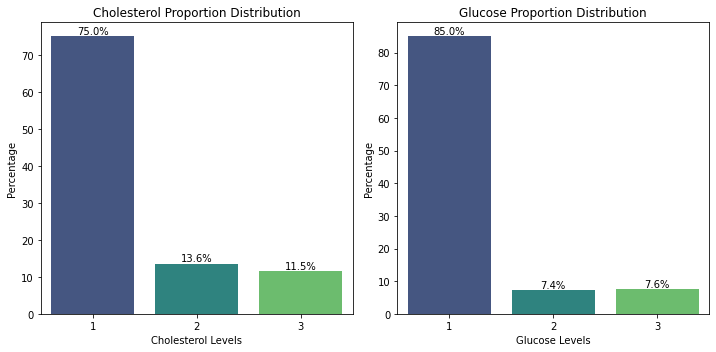

In [6]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window
import seaborn as sns
import matplotlib.pyplot as plt

# Define a window spec
windowSpec = Window.rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)

# Calculate value counts for 'cholesterol', 'glucose', and 'cardio'
cholesterol_counts = (df.groupBy("cholesterol")
                      .count()
                      .withColumn("total", F.sum("count").over(windowSpec))
                      .withColumn("percentage", (F.col("count") / F.col("total")) * 100))
glucose_counts = (df.groupBy("glucose")
                  .count()
                  .withColumn("total", F.sum("count").over(windowSpec))
                  .withColumn("percentage", (F.col("count") / F.col("total")) * 100))

# Collect the necessary data for plotting
cholesterol_data = cholesterol_counts.orderBy("cholesterol").collect()
glucose_data = glucose_counts.orderBy("glucose").collect()

# Visualization using seaborn
plt.figure(figsize=(15, 5))

# Plot for 'cholesterol'
plt.subplot(1, 3, 1)
cholesterol_bar = sns.barplot(x=[row['cholesterol'] for row in cholesterol_data], 
                             y=[row['percentage'] for row in cholesterol_data], palette="viridis")
plt.title('Cholesterol Proportion Distribution')
plt.ylabel('Percentage')
plt.xlabel('Cholesterol Levels')

# Add percentage on top of each bar
for i, row in enumerate(cholesterol_data):
    cholesterol_bar.text(i, row['percentage'], f"{row['percentage']:.1f}%", color='black', ha="center", va="bottom")

# Plot for 'glucose'
plt.subplot(1, 3, 2)
glucose_bar = sns.barplot(x=[row['glucose'] for row in glucose_data], 
                          y=[row['percentage'] for row in glucose_data], palette="viridis")
plt.title('Glucose Proportion Distribution')
plt.ylabel('Percentage')
plt.xlabel('Glucose Levels')

# Add percentage on top of each bar
for i, row in enumerate(glucose_data):
    glucose_bar.text(i, row['percentage'], f"{row['percentage']:.1f}%", color='black', ha="center", va="bottom")

# Display the plots
plt.tight_layout()
plt.show()


In [5]:
from pyspark.sql.functions import when, col

# Group Glucose & Cholesterol
dgroup = df.withColumn("cholesterol", when(col("cholesterol") == 1, 0).otherwise(1))
dgroup = dgroup.withColumn("glucose", when(col("glucose") == 1, 0).otherwise(1))

# save to CSV
dgroup.write.csv("dgroup.csv", header=True)

# check DataFrame 
dgroup.printSchema()

dgroup.show(10)

AnalysisException: path file:/home/ubuntu/wany056/dgroup.csv already exists.

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql import Window
import matplotlib.pyplot as plt
import seaborn as sns

df1 = df

# Create a Window spec
windowSpec = Window.rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)

# Calculate counts and percentages
cardio_counts_df = df1.groupBy("cardio").count()\
    .withColumn("total", F.sum("count").over(windowSpec))\
    .withColumn("percentage", (F.col("count") / F.col("total")) * 100)

# Collect the results to the driver
cardio_counts = cardio_counts_df.collect()

# Extract indices, raw counts, and percentages for visualization
indices = [row['cardio'] for row in cardio_counts]
values = [row['percentage'] for row in cardio_counts]
raw_counts = [row['count'] for row in cardio_counts]

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
cardio_bar = sns.barplot(x=indices, y=values, palette="viridis")
plt.title('Cardiovascular Disease Proportion Distribution')
plt.ylabel('Percentage')
plt.xlabel('Cardio (0: Absent, 1: Present)')

# Add raw count and percentage on top of each bar
for index, (value, count) in enumerate(zip(values, raw_counts)):
    cardio_bar.text(index, value/2, f'Count: {count}', ha="center", va="center", color="white", fontsize=10)
    cardio_bar.text(index, value + 1, f'{value:.1f}%', ha="center")

plt.tight_layout()
plt.show()


In [ ]:
from pyspark.sql import functions as F

# Calculate the count for each class
count_0 = df1.filter(df1.cardio == 0).count()
count_1 = df1.filter(df1.cardio == 1).count()

# Determine the class with the fewer count
min_count = min(count_0, count_1)

# Downsample the dataset
df1_balanced = df1.sampleBy("cardio", fractions={0: min_count/count_0, 1: min_count/count_1}, seed=42)

# Calculate the distribution of cardio after balancing
total = df1_balanced.count()
cardio_counts_balanced = df1_balanced.groupBy("cardio").count().withColumn("percentage", (F.col("count") / total) * 100).collect()

import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data
x = [row['cardio'] for row in cardio_counts_balanced]
y = [row['percentage'] for row in cardio_counts_balanced]

# Visualization
plt.figure(figsize=(7, 5))
cardio_bar = sns.barplot(x=x, y=y, palette="viridis")
plt.title('Proportion Distribution of Cardiovascular Disease After Balancing')
plt.ylabel('Percentage')
plt.xlabel('Cardio (0: Absent, 1: Present)')

# Add the percentage on top of each bar
for p, label in zip(cardio_bar.patches, y):
    cardio_bar.annotate(f'{label:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

plt.tight_layout()
plt.show()


In [ ]:
from pyspark.sql import SparkSession

# Assuming you have already initialized your SparkSession
spark = SparkSession.builder.appName("Data Overview").getOrCreate()

# Assuming dgroup is your DataFrame

# Number of entries
num_entries = dgroup.count()

# Columns description
columns_description = dgroup.describe().collect()

print(f"RangeIndex: {num_entries} entries, 0 to {num_entries - 1}")
print("Data columns (total {} columns):".format(len(dgroup.columns)))
print("#    Column          Non-Null Count     Dtype")
print("-" * 50)

for column in dgroup.columns:
    non_null_count = int(columns_description[0][column])
    dtype = dgroup.schema[column].dataType
    print(f"{column}    {non_null_count} non-null    {dtype}")

In [ ]:
# Drop the specified columns
redu2 = dgroup.drop('id', 'height', 'weight')

# Save the DataFrame to a CSV file
redu2.write.csv("redu4.csv", header=True, mode="overwrite")

redu2.show()

In [10]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import log1p, skewness, desc

# Create or retrieve a Spark session
spark = SparkSession.builder.appName("SparkTransformations").getOrCreate()

# Load the csv file
dtran = spark.read.csv('redu4.csv', header=True, inferSchema=True)

# Calculate skewness for selected columns
selected_columns = ['age', 'ap_lo', 'ap_hi', 'BMI']
for column in selected_columns:
    dtran.agg(skewness(dtran[column])).show()

# Show descriptive stats for 'BMI', 'ap_hi', and 'ap_lo'
dtran.select(['BMI', 'ap_hi', 'ap_lo']).describe().show()

# Perform the transformations
dtran = dtran.withColumn('BMI_log', log1p(dtran['BMI']))
dtran = dtran.withColumn('ap_hi_log', log1p(dtran['ap_hi']))
dtran = dtran.withColumn('ap_lo_log', log1p(dtran['ap_lo']))

# Check the skewness for the transformed columns
transformed_skewness_columns = ['BMI_log', 'ap_hi_log', 'ap_lo_log']
for column in transformed_skewness_columns:
    dtran.agg(skewness(dtran[column])).show()

# Show descriptive stats for 'BMI', 'ap_hi', and 'ap_lo' after transformation
dtran.select(['BMI', 'ap_hi', 'ap_lo']).describe().show()


+-------------------+
|      skewness(age)|
+-------------------+
|-0.3028967945091443|
+-------------------+

+------------------+
|   skewness(ap_lo)|
+------------------+
|0.5043649410404806|
+------------------+

+------------------+
|   skewness(ap_hi)|
+------------------+
|0.5743583182788287|
+------------------+

+------------------+
|     skewness(BMI)|
+------------------+
|0.7513436693526874|
+------------------+

+-------+------------------+------------------+------------------+
|summary|               BMI|             ap_hi|             ap_lo|
+-------+------------------+------------------+------------------+
|  count|             68742|             68742|             68742|
|   mean|27.076328430944233|125.80764307119374| 81.83161676995141|
| stddev| 4.577859445594776|15.080902971296986|7.6331319404921825|
|    min|            13.521|              90.0|              65.0|
|    max|            50.892|             170.0|             105.0|
+-------+------------------+-------

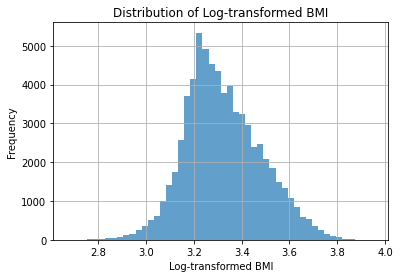

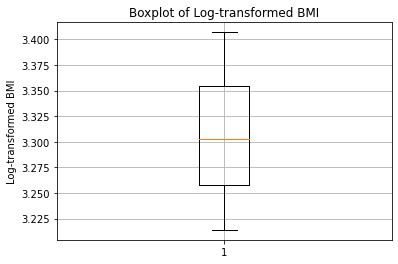

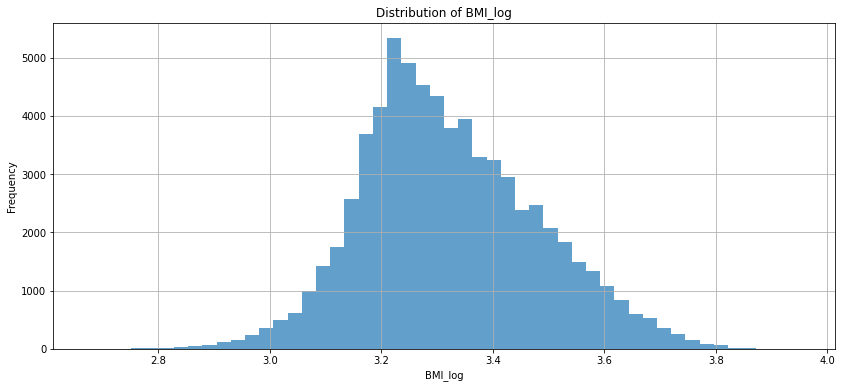

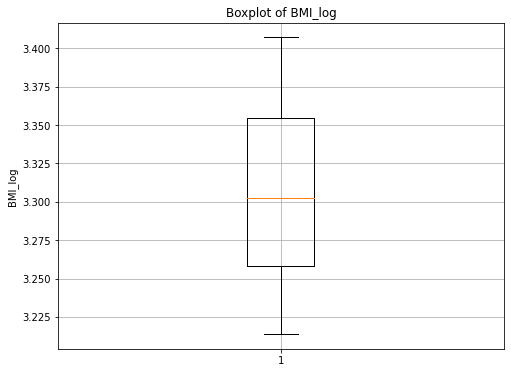

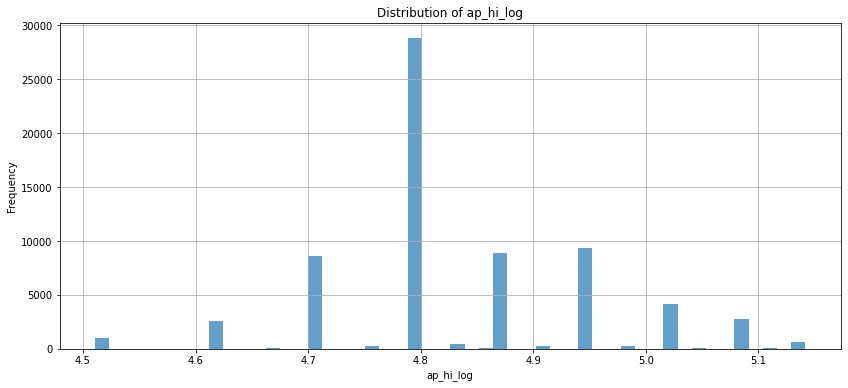

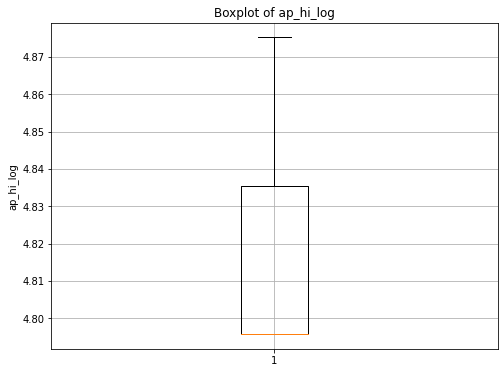

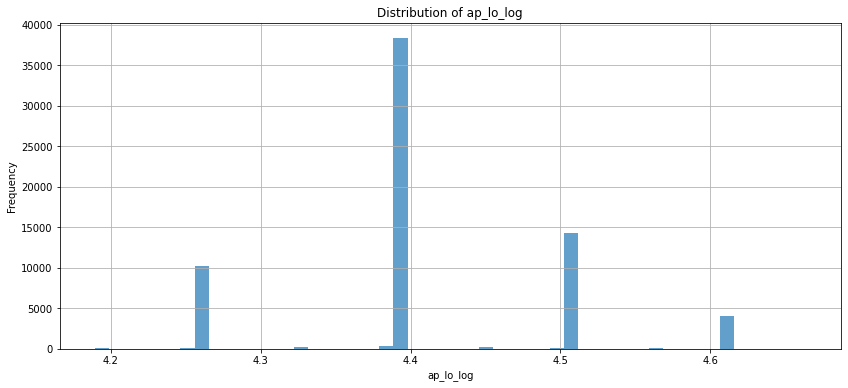

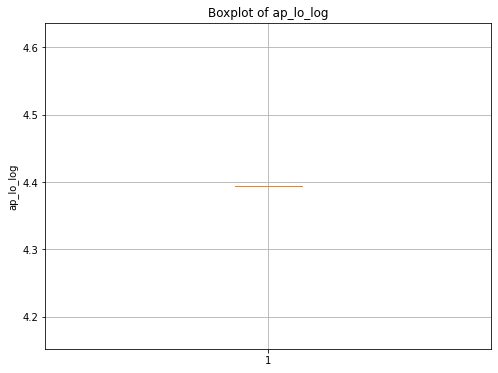

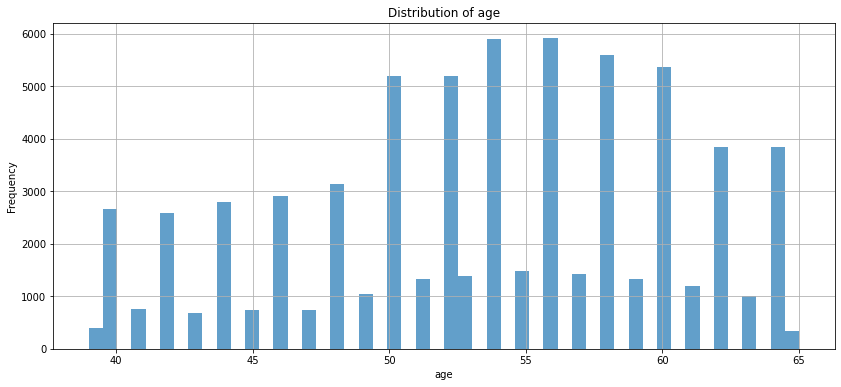

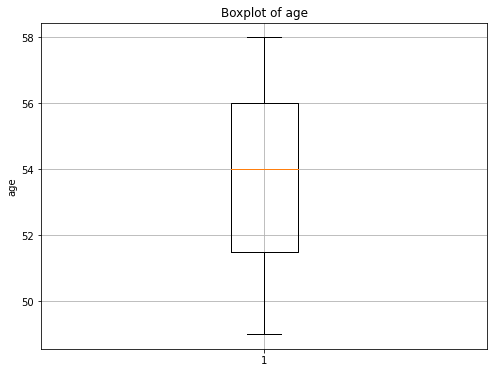

In [9]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Assuming dgroup is your original Spark DataFrame

# Perform log transformations
dtran = dgroup.withColumn('BMI_log', F.log1p(dgroup['BMI']))

# Compute histogram data in Spark
hist_data = dtran.select('BMI_log').rdd.flatMap(lambda x: x).histogram(50)

# Use this histogram data for plotting
plt.hist(hist_data[0][:-1], bins=hist_data[0], weights=hist_data[1], alpha=0.7)
plt.title('Distribution of Log-transformed BMI')
plt.xlabel('Log-transformed BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# For the boxplot, we need quartiles, which we can compute in Spark
quantiles = dtran.stat.approxQuantile('BMI_log', [0.25, 0.5, 0.75], 0.05)
plt.boxplot(quantiles)
plt.title('Boxplot of Log-transformed BMI')
plt.ylabel('Log-transformed BMI')
plt.grid(True)
plt.show()

from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import numpy as np

# Assuming dgroup is your original Spark DataFrame

# Perform log transformations
dtran = dgroup.withColumn('BMI_log', F.log1p(dgroup['BMI']))
dtran = dtran.withColumn('ap_hi_log', F.log1p(dtran['ap_hi']))
dtran = dtran.withColumn('ap_lo_log', F.log1p(dtran['ap_lo']))

# Visualization function for distribution and boxplot
def plot_column(col_name):
    # Compute histogram data in Spark
    hist_data = dtran.select(col_name).rdd.flatMap(lambda x: x).histogram(50)

    # Use this histogram data for plotting
    plt.figure(figsize=(14,6))
    plt.hist(hist_data[0][:-1], bins=hist_data[0], weights=hist_data[1], alpha=0.7)
    plt.title(f'Distribution of {col_name}')
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # For the boxplot, we need quartiles, which we can compute in Spark
    quantiles = dtran.stat.approxQuantile(col_name, [0.25, 0.5, 0.75], 0.05)
    plt.figure(figsize=(8,6))
    plt.boxplot(quantiles)
    plt.title(f'Boxplot of {col_name}')
    plt.ylabel(col_name)
    plt.grid(True)
    plt.show()

# List of columns to visualize
columns_to_plot = ['BMI_log', 'ap_hi_log', 'ap_lo_log', 'age']

for col in columns_to_plot:
    plot_column(col)

